# Project 3

Using any of the three classifiers described in chapter 6 of Natural Language Processing with Python, and any features you can think of, build the best name gender classifier you can. Begin by splitting the Names Corpus into three subsets: 500 words for the test set, 500 words for the dev-test set, and the remaining 6900 words for the training set. Then, starting with the example name gender classifier, make incremental improvements. Use the dev-test set to check your progress. Once you are satisfied with your classifier, check its final performance on the test set.

How does the performance on the test set compare to the performance on the dev-test set? Is this what you'd expect?

Source: Natural Language Processing with Python, exercise 6.10.2.

## Required Packages

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import nltk
from sklearn.utils import shuffle

## Load Names Corpus Dataset 

In [48]:
files = nltk.corpus.names.fileids()
files

['female.txt', 'male.txt']

## Merge both text files into one DataFrame

In [49]:
names_df = pd.DataFrame(columns=['name', 'gender'])

for file in files:
    name, extension = file.split('.')
    temp_df = pd.DataFrame({'name':nltk.corpus.names.words(file), 'gender':name})
    names_df = pd.concat([names_df, temp_df])

In [50]:
names_df

,name,gender
0,Abagael,female
1,Abagail,female
2,Abbe,female
3,Abbey,female
4,Abbi,female
...,...,...
2938,Zeus,male
2939,Zippy,male
2940,Zollie,male
2941,Zolly,male


## Create Training, Dev-Test and Testing Set

In [78]:
df_shuffled = shuffle(names_df, random_state=123)

train_set = df_shuffled.iloc[:len(names_df)-1000]  
dev_test_set = df_shuffled.iloc[500:1000]
test_set = df_shuffled.tail(500)

print("Train Set: ", len(train_set))
print("Dev-Test Set: ", len(dev_test_set))
print("Test Set: ", len(test_set))

Train Set:  6944
Dev-Test Set:  500
Test Set:  500


## Exploratory Data Analysis

### Total Names by Gender

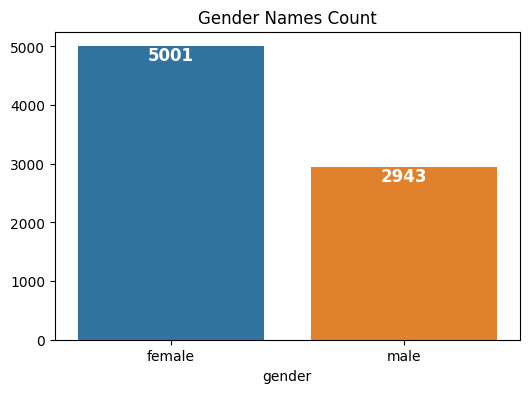

In [51]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=names_df, x='gender', hue='gender')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height() - 0.1),  # Slightly below the top
                ha='center', va='top', fontsize=12, color='white', fontweight='bold')


plt.title('Gender Names Count')
plt.ylabel('')
plt.show()

## Create Gender Features

In [52]:
names_df['name'] = names_df['name'].str.lower()

names_df['first_letter'] = names_df['name'].str[0]
names_df['last_letter'] = names_df['name'].str[-1]
names_df['first_two_letters'] = names_df['name'].str[:2]
names_df['last_two_letters'] = names_df['name'].str[-2:]
names_df['name_length'] = names_df['name'].str.len()

def count_vowels(name):
    return sum(1 for char in name.lower() if char in 'aeiou')
names_df['vowel_count'] = names_df['name'].apply(count_vowels)

In [53]:
names_df

,name,gender,first_letter,last_letter,first_two_letters,last_two_letters,name_length,vowel_count
0,abagael,female,a,l,ab,el,7,4
1,abagail,female,a,l,ab,il,7,4
2,abbe,female,a,e,ab,be,4,2
3,abbey,female,a,y,ab,ey,5,2
4,abbi,female,a,i,ab,bi,4,2
...,...,...,...,...,...,...,...,...
2938,zeus,male,z,s,ze,us,4,2
2939,zippy,male,z,y,zi,py,5,1
2940,zollie,male,z,e,zo,ie,6,3
2941,zolly,male,z,y,zo,ly,5,1


### Relative Frequency of First Letter by Gender

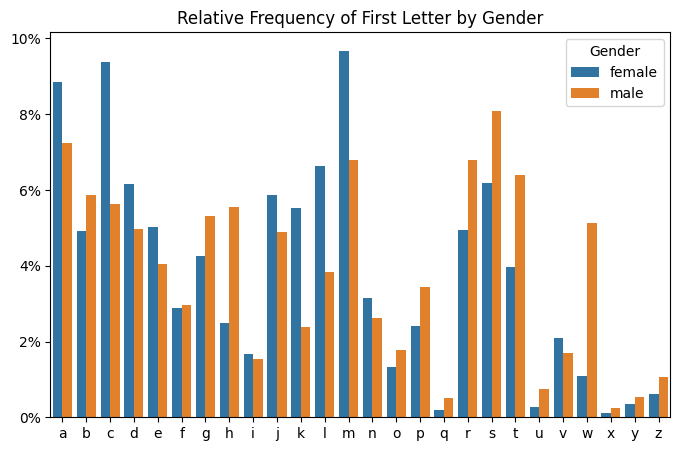

In [54]:
gender_counts = names_df.groupby(['gender', 'first_letter']).size().reset_index(name='count')
gender_totals = gender_counts.groupby('gender')['count'].transform('sum')
gender_counts['relative_frequency'] = gender_counts['count'] / gender_totals * 100

plt.figure(figsize=(8, 5))
ax = sns.barplot(x='first_letter', y='relative_frequency', hue='gender', data=gender_counts)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.0f}%'))

plt.title('Relative Frequency of First Letter by Gender')
plt.xlabel('')
plt.ylabel('')
plt.legend(title='Gender')
plt.show()

### Relative Frequency of Last Letter by Gender

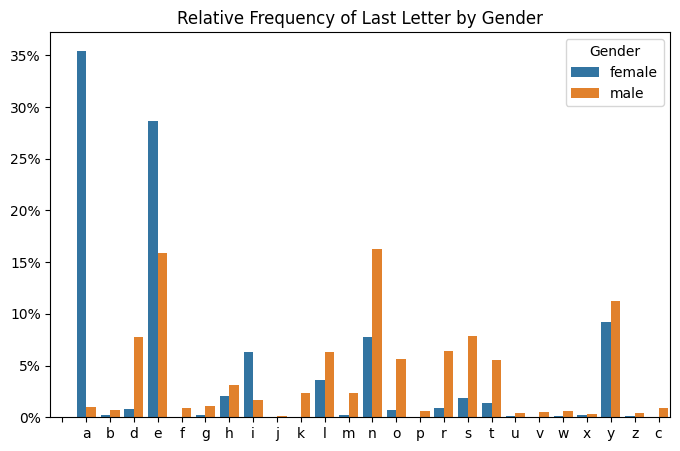

In [68]:
gender_counts = names_df.groupby(['gender', 'last_letter']).size().reset_index(name='count')
gender_totals = gender_counts.groupby('gender')['count'].transform('sum')
gender_counts['relative_frequency'] = gender_counts['count'] / gender_totals * 100

plt.figure(figsize=(8, 5))
ax = sns.barplot(x='last_letter', y='relative_frequency', hue='gender', data=gender_counts)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.0f}%'))

plt.title('Relative Frequency of Last Letter by Gender')
plt.xlabel('')
plt.ylabel('')
plt.legend(title='Gender')
plt.show()

### Relative Frequency of Name Length by Gender

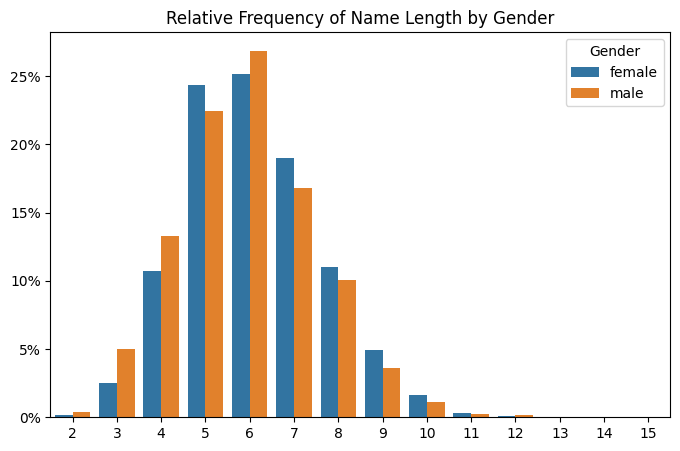

In [71]:
gender_counts = names_df.groupby(['gender', 'name_length']).size().reset_index(name='count')
gender_totals = gender_counts.groupby('gender')['count'].transform('sum')
gender_counts['relative_frequency'] = gender_counts['count'] / gender_totals * 100

plt.figure(figsize=(8, 5))
ax = sns.barplot(x='name_length', y='relative_frequency', hue='gender', data=gender_counts)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.0f}%'))

plt.title('Relative Frequency of Name Length by Gender')
plt.xlabel('')
plt.ylabel('')
plt.legend(title='Gender')
plt.show()

### Relative Frequency of Vowel Count by Gender

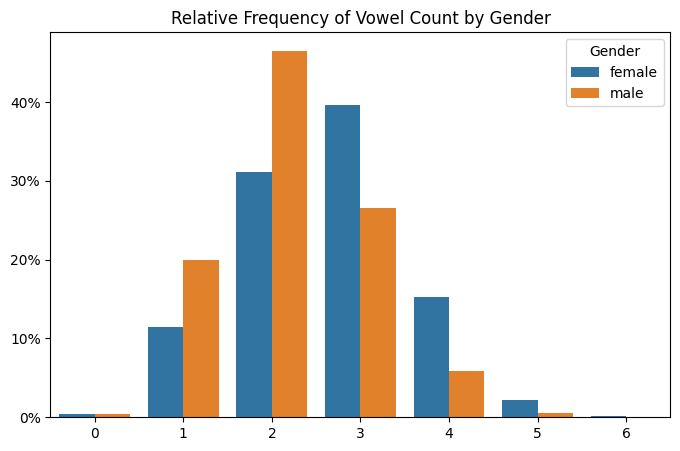

In [72]:
gender_counts = names_df.groupby(['gender', 'vowel_count']).size().reset_index(name='count')
gender_totals = gender_counts.groupby('gender')['count'].transform('sum')
gender_counts['relative_frequency'] = gender_counts['count'] / gender_totals * 100

plt.figure(figsize=(8, 5))
ax = sns.barplot(x='vowel_count', y='relative_frequency', hue='gender', data=gender_counts)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.0f}%'))

plt.title('Relative Frequency of Vowel Count by Gender')
plt.xlabel('')
plt.ylabel('')
plt.legend(title='Gender')
plt.show()